#### Copy our example of linear regression: [link](https://github.com/lhlich/ml_coding/blob/master/classic_ml/linear_regression_gradient_descent.ipynb)

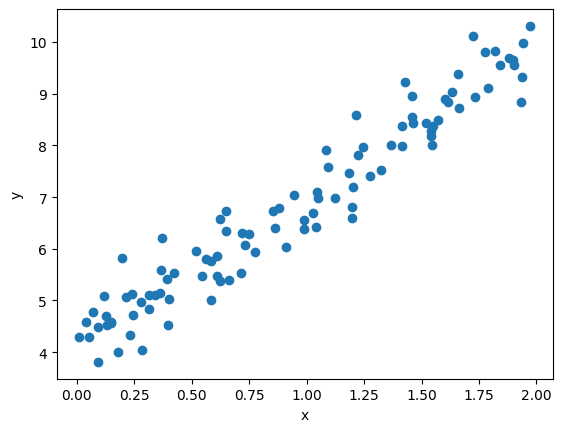

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)

# we'll never know the ground truth of nosie_sigma, b1 or b0
noise_sigma = 0.5
w = 3
b = 4

y = b + w * X + noise_sigma * np.random.randn(m, 1)

plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
def MSE(y_pred, y_truth) -> float:
    return np.mean((y_pred - y_truth) ** 2)

y_pred_ideal = b + w * X
print(f'MSE loss from an oracle: {MSE(y_pred_ideal, y)}')

from typing import List
from torch.utils.tensorboard import SummaryWriter
run = 'tb_demo/lr_updated'
writer = SummaryWriter(run)
writer.add_text('description', 'TB example for linear regression')

max_epochs = 100
learning_rate = 0.05

params = np.random.randn(2, 1) # [w, b]
params_history = [params.copy()]
for i in range(1, max_epochs+1):
    w_gd, b_gd = params
    pred = X * w_gd + b_gd

    dLdw = (-2/m) * np.sum(X*(y-pred))
    dLdb = (-2/m) * np.sum(y-pred)
    gradient = np.array([dLdw, dLdb]).reshape(2, 1)

    writer.add_scalar(tag='metrics/MSE_loss', scalar_value=MSE(y, pred), global_step=i)
    writer.add_scalars(main_tag='metrics/parameters', tag_scalar_dict={'w': w_gd, 'b': b_gd}, global_step=i)
    writer.add_scalars(main_tag='metrics/gradients', tag_scalar_dict={'w': dLdw, 'b': dLdb}, global_step=i)

    params -= learning_rate*gradient
    params_history.append(params.copy())

writer.close()

# tensorboard --logdir .\deep_learning\tb_demo\lr\ to start a session and view it

MSE loss from an oracle: 0.2062766949769846


In [10]:
from tensorboard import notebook
%load_ext tensorboard
notebook.list()

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Known TensorBoard instances:
  - port 6007: logdir tb_demo/lr3 (started 1:17:38 ago; pid 14396)
  - port 6009: logdir tb_demo/lr (started 1:26:53 ago; pid 15932)
  - port 6008: logdir run (started 1:27:44 ago; pid 23508)
  - port 6007: logdir logs (started 1:28:03 ago; pid 38136)
  - port 6007: logdir tb_demo/lr2 (started 1:24:46 ago; pid 44104)


In [11]:
%tensorboard --logdir tb_demo/lr_updated
notebook.list()

Known TensorBoard instances:
  - port 6007: logdir tb_demo/lr3 (started 1:17:58 ago; pid 14396)
  - port 6009: logdir tb_demo/lr (started 1:27:13 ago; pid 15932)
  - port 6008: logdir run (started 1:28:04 ago; pid 23508)
  - port 6007: logdir logs (started 1:28:23 ago; pid 38136)
  - port 6007: logdir tb_demo/lr2 (started 1:25:06 ago; pid 44104)
  - port 6008: logdir tb_demo/lr_updated (started 0:00:01 ago; pid 44256)


In [12]:
notebook.display(port=6008, height=1000)

Selecting TensorBoard with logdir tb_demo/lr_updated (started 0:00:26 ago; port 6008, pid 44256).


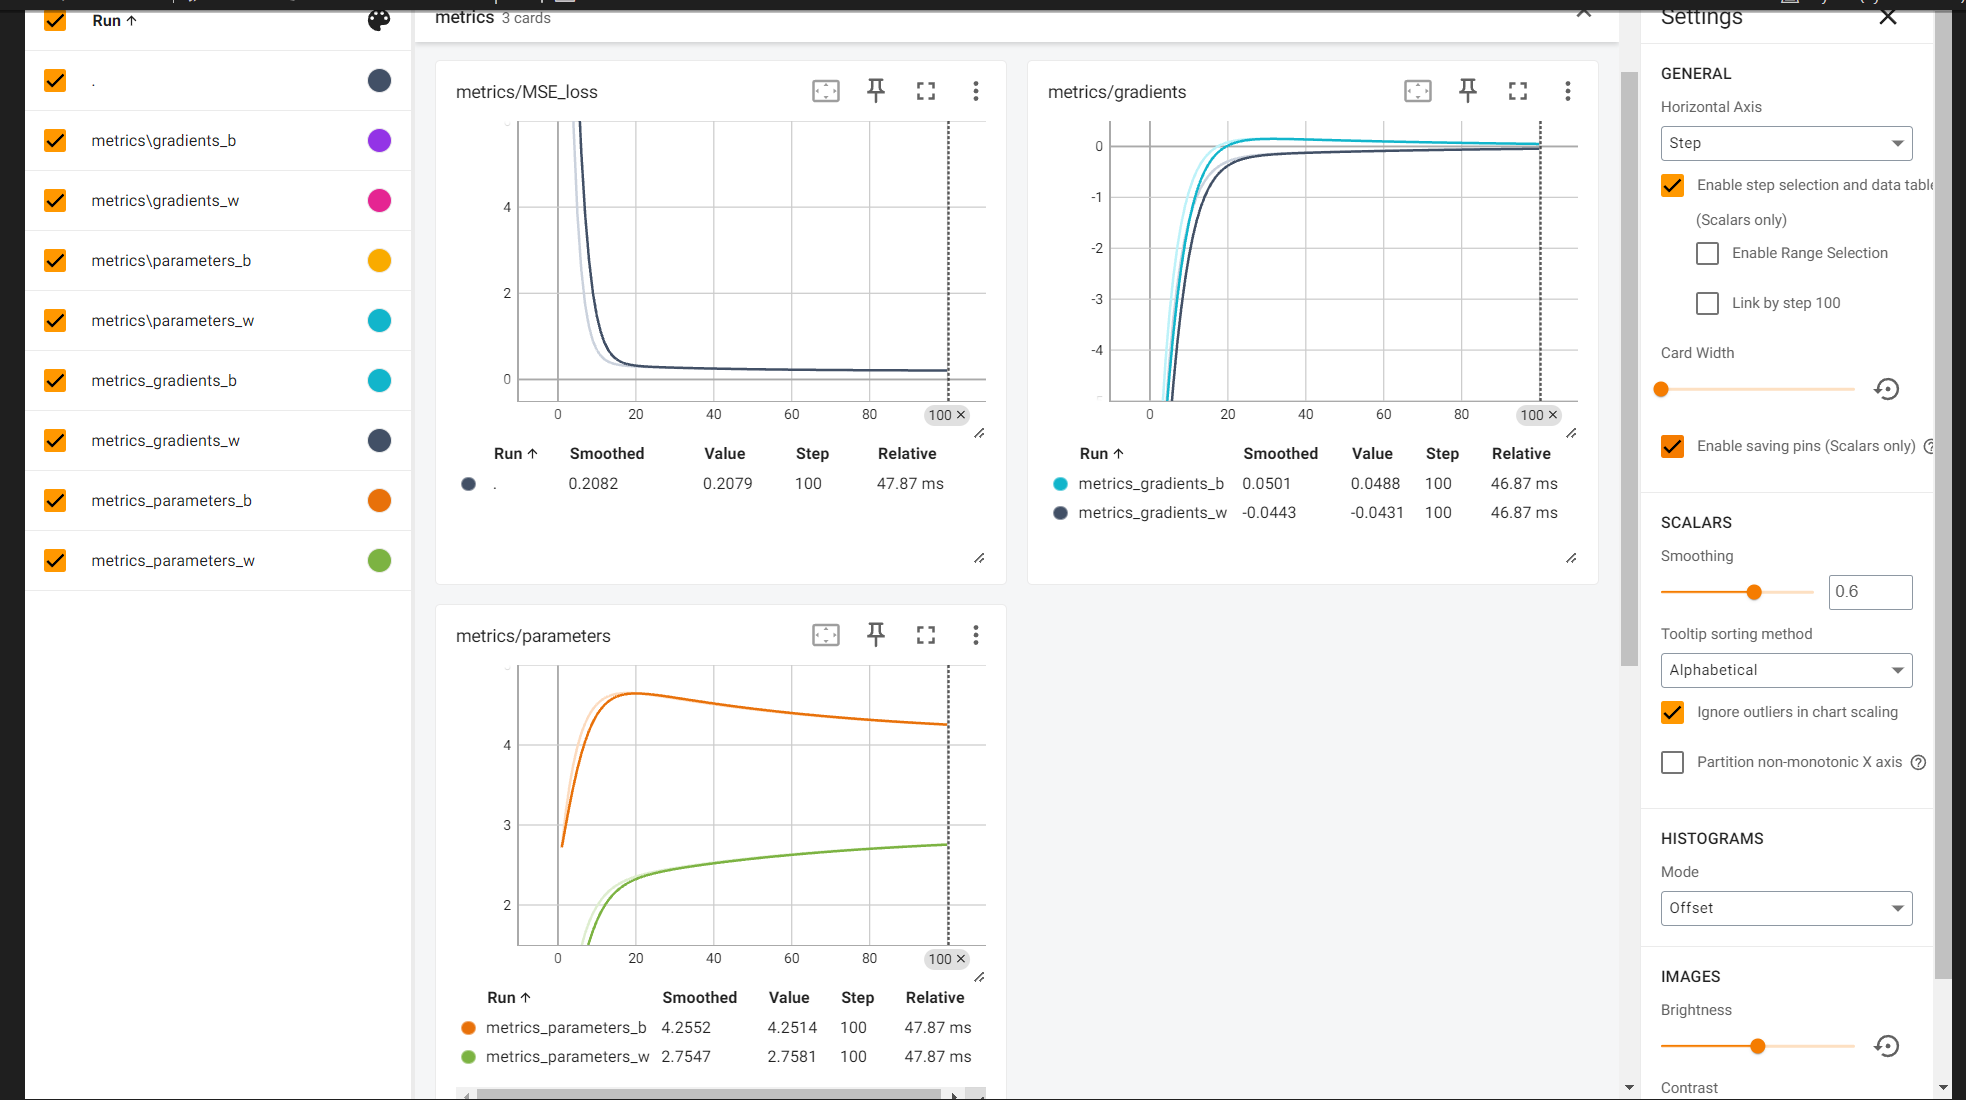

In [16]:
from IPython.display import Image

# Display the image
Image(filename="tb_demo/lr_updated.png")